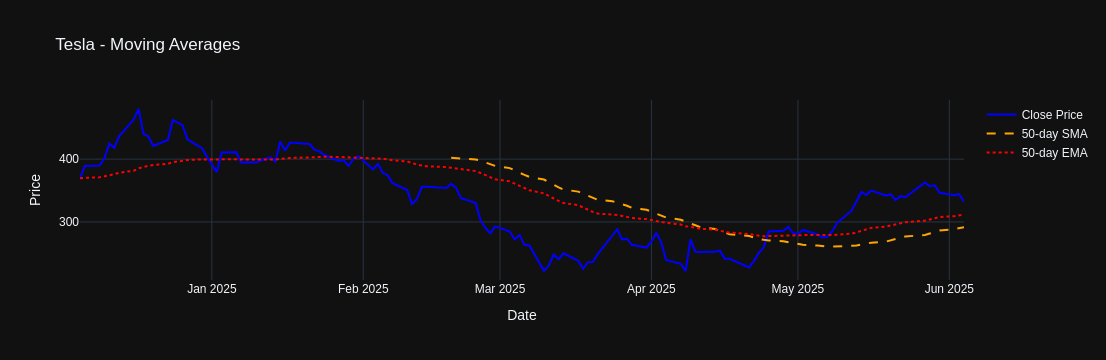

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import talib
import yfinance as yf

def fetch_data(ticker, period='6mo'):
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    return df

# Fetch Tesla stock data
ticker = 'TSLA'
df = fetch_data(ticker)
df['Date'] = df.index

# Calculate Moving Averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Create interactive Plotly figure
fig = go.Figure()

# Add Close Price
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price', line=dict(color='blue', width=2)))

# Add SMA 50
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_50'], mode='lines', name='50-day SMA', line=dict(color='orange', width=2, dash='dash')))

# Add EMA 50
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA_50'], mode='lines', name='50-day EMA', line=dict(color='red', width=2, dash='dot')))

# Update layout
fig.update_layout(title='Tesla - Moving Averages', xaxis_title='Date', yaxis_title='Price', template='plotly_dark', hovermode='x')

# Show figure
fig.show()

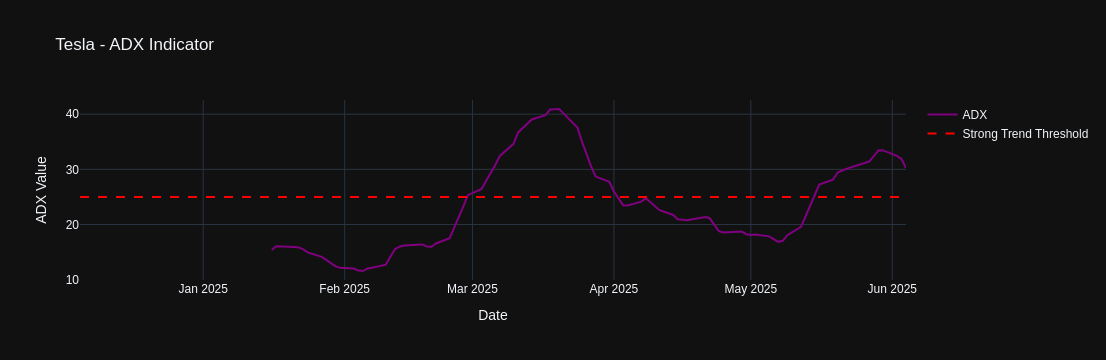

In [2]:
# Calculate ADX
df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)

# Create ADX figure
fig_adx = go.Figure()
fig_adx.add_trace(go.Scatter(x=df['Date'], y=df['ADX'], mode='lines', name='ADX', line=dict(color='purple', width=2)))
fig_adx.add_trace(go.Scatter(x=df['Date'], y=[25]*len(df), mode='lines', name='Strong Trend Threshold', line=dict(color='red', width=2, dash='dash')))

# Update layout
fig_adx.update_layout(title='Tesla - ADX Indicator', xaxis_title='Date', yaxis_title='ADX Value', template='plotly_dark', hovermode='x')

# Show figure
fig_adx.show()

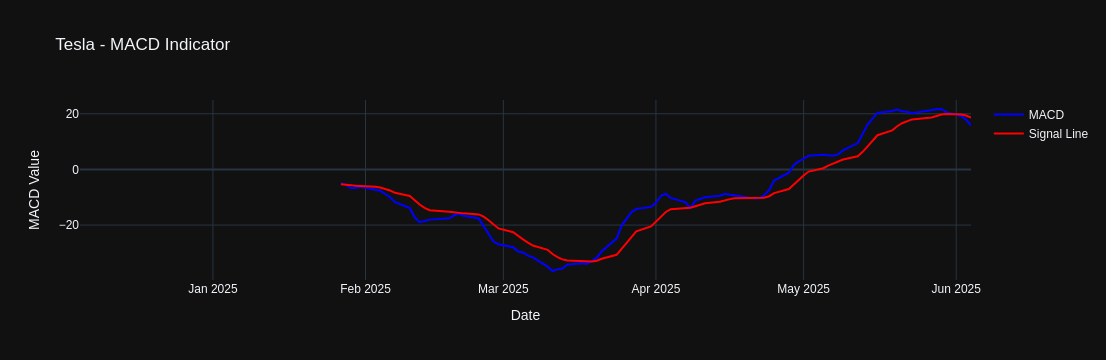

In [3]:
# Calculate MACD
df['MACD'], df['Signal'], _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Create MACD figure
fig_macd = go.Figure()
fig_macd.add_trace(go.Scatter(x=df['Date'], y=df['MACD'], mode='lines', name='MACD', line=dict(color='blue', width=2)))
fig_macd.add_trace(go.Scatter(x=df['Date'], y=df['Signal'], mode='lines', name='Signal Line', line=dict(color='red', width=2)))

# Update layout
fig_macd.update_layout(title='Tesla - MACD Indicator', xaxis_title='Date', yaxis_title='MACD Value', template='plotly_dark', hovermode='x')

# Show figure
fig_macd.show()

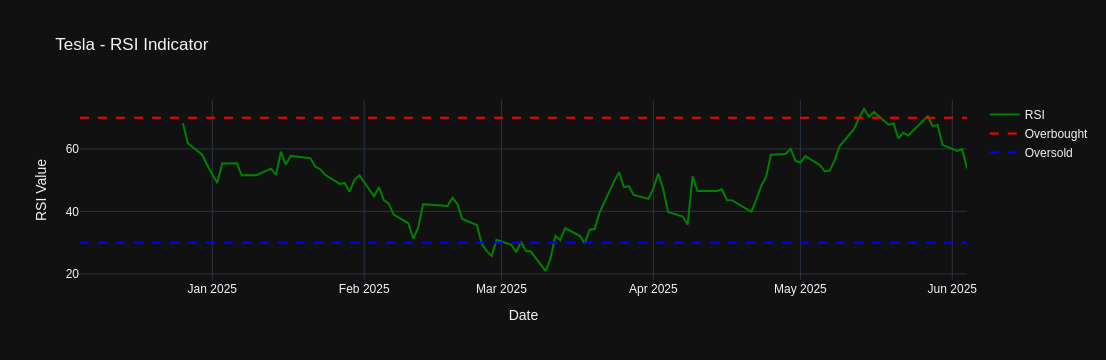

In [4]:
# Calculate RSI
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Create RSI figure
fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], mode='lines', name='RSI', line=dict(color='green', width=2)))
fig_rsi.add_trace(go.Scatter(x=df['Date'], y=[70]*len(df), mode='lines', name='Overbought', line=dict(color='red', width=2, dash='dash')))
fig_rsi.add_trace(go.Scatter(x=df['Date'], y=[30]*len(df), mode='lines', name='Oversold', line=dict(color='blue', width=2, dash='dash')))

# Update layout
fig_rsi.update_layout(title='Tesla - RSI Indicator', xaxis_title='Date', yaxis_title='RSI Value', template='plotly_dark', hovermode='x')

# Show figure
fig_rsi.show()


In [5]:
# Calculate Bollinger Bands
upper, middle, lower = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

df['Upper Band'] = upper
df['Middle Band'] = middle
df['Lower Band'] = lower

# Create Bollinger Bands figure
fig_bb = go.Figure()
fig_bb.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price', line=dict(color='blue', width=2)))
fig_bb.add_trace(go.Scatter(x=df['Date'], y=df['Upper Band'], mode='lines', name='Upper Band', line=dict(color='red', width=2, dash='dash')))
fig_bb.add_trace(go.Scatter(x=df['Date'], y=df['Middle Band'], mode='lines', name='Middle Band', line=dict(color='orange', width=2, dash='dash')))
fig_bb.add_trace(go.Scatter(x=df['Date'], y=df['Lower Band'], mode='lines', name='Lower Band', line=dict(color='green', width=2, dash='dash')))
fig_bb.add_trace(go.Scatter(x=df['Date'], y=df['Upper Band'], fill='tonexty', mode='none', fillcolor='rgba(200,200,200,0.2)', name='Bollinger Band Range'))

# Update layout
fig_bb.update_layout(title='Tesla - Bollinger Bands', xaxis_title='Date', yaxis_title='Price', template='plotly_dark', hovermode='x')

# Show figure
fig_bb.show()
